In [1]:
%load_ext autoreload
%autoreload 2
%cd ..

c:\Users\Admin\OneDrive\Python


In [4]:
import numpy as np
import pandas as pd
import scipy
import toolkit as ftk
import statsmodels.api as sm
from sklearn import linear_model

unit_price = pd.Series([100,100.3,102.91,104.04,103.1,104.55,107.06,108.66,115.83,114.21,118.67,118.07,127.64,132.74,127.83,120.03,121.71,115.75,113.32,120.34,127.32,119.18,121.2,120.72,120.48,117.95,119.24,124.85,127.84,132.06,131.14,137.3,138.13,139.51,139.23,143.96,145.4],
    index=pd.date_range('1999-12', periods=37, freq='M'))
benchmark_price = pd.Series([100,100.2,102.71,104.55,103.4,104.85,107.26,108.76,115.83,114.1,118.89,118.53,128.37,133.38,128.31,120.35,122.16,116.29,113.97,120.81,127.57,119.03,121.29,120.92,120.8,117.66,118.48,123.58,127.16,132,131.73,138.45,140.39,142.21,142.64,147.49,150.59],
    index=pd.date_range('1999-12', periods=37, freq='M'))
risk_free_return = pd.Series([0.001,0.001,0.002,0.002,0.002,0.002,0.002,0.003,0.003,0.004,0.004,0.003,0.003,0.003,0.003,0.004,0.002,0.002,0.002,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.002,0.002,0.002,0.002,0.002,0.002,0.002],
    index=pd.period_range('2000-01', periods=36, freq='M'))

aa = ftk.price_to_return(unit_price)
bb = ftk.price_to_return(benchmark_price)

prices = pd.concat([unit_price, benchmark_price], axis=1)
benchmarks = prices = pd.concat([benchmark_price, unit_price], axis=1)

x = pd.Series(np.arange(1, 11), index= pd.date_range('2023-10-27', periods=10, freq='D'))
x = x[x.index.day_of_week < 5]

ftk.summary(x)

c:\Users\Admin\OneDrive\Python\financial-toolkit\toolkit\functional.py:22: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  s.index = p.index.to_period()
c:\Users\Admin\OneDrive\Python\financial-toolkit\toolkit\functional.py:30: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  s.index = pd.date_range(end=r.index[-1].to_timestamp(how='e').date(), periods=len(r.index) + 1, freq=r.index.freq)
c:\Users\Admin\OneDrive\Python\financial-toolkit\toolkit\functional.py:30: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  s.index = pd.date_range(end=r.index[-1].to_timestamp(how='e').date(), periods=len(r.index) + 1, freq=r.index.freq)
c:\Users\Admin\OneDrive\Python\financial-toolkit\toolkit\functional.py:156: RuntimeWarning: divide by zero enc

{'Number of period': 5,
 'Frequency': 'B',
 'Total Return': 6.999999999999998,
 'Periodic mean return': 0.751904761904762,
 'Total return': 6.999999999999998,
 'Annualized return': 3.278954153569253e+45,
 'Mean absolute deviation': 0.8992380952380952,
 'Variance': 1.58097052154195,
 'Period Volatility': 1.2573665024733043,
 'Annualized Volatility': 19.960074434444664,
 'Sharpe (0.00%)': 1.6427564758530326e+44,
 'Skewness': 2.2303748301577975,
 'Excess Kurtosis': 4.979449848557444,
 'Worst Drawdown': 0.0,
 'Calmar': -inf,
 'Average Drawdown': nan,
 'Modified Sterling': nan,
 'Drawdown Deviation': -0.0,
 'Modified Burke': inf,
 'Average Annual Drawdown': 0.0,
 'Sterling-Calmar': -inf,
 'Pain Index': 0.0,
 'Pain Ratio': inf,
 'Ulcer Index': 0.0,
 'Martin Ratio': inf,
 '': inf}

In [1]:
import pandas as pd
import toolkit as ftk

portfolio = ftk.price_to_return(ftk.get_yahoo('ARKK'))
factors = ftk.get_famafrench_factors('North_America_3_Factors_Daily', True)

if ftk.periodicity(portfolio) > ftk.periodicity(factors):
    portfolio = portfolio.resample(factors.index.freqstr).aggregate(ftk.compound_return)

merged = pd.merge(portfolio, factors, left_index=True, right_index=True)
portfolio = merged.iloc[:, 0]
factors = merged.iloc[:, 1:]
betas = ftk.beta(portfolio, factors) #.sort_values() doesn't matter

attribution = betas * factors
explained = attribution.sum(axis=1)
attribution['Unexplained'] = portfolio - explained

combined = pd.concat([portfolio, explained], axis=1)
combined.columns = ['Portfolio', 'Explained by Betas']

k = (attribution.T * ftk.carino(portfolio, 0)).T / ftk.carino(ftk.compound_return(portfolio), 0)
k.sum()

c:\Users\Admin\OneDrive\Python\financial-toolkit\toolkit\functional.py:21: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  s = p.pct_change()
c:\Users\Admin\OneDrive\Python\financial-toolkit\toolkit\functional.py:22: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  s.index = p.index.to_period()
c:\Users\Admin\OneDrive\Python\financial-toolkit\toolkit\functional.py:22: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  s.index = p.index.to_period()


HERE B


c:\Users\Admin\OneDrive\Python\financial-toolkit\toolkit\data.py:17: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = pdr.get_data_famafrench(dataset, start='1990-01-01')[0].asfreq(freq) / 100
c:\Users\Admin\OneDrive\Python\financial-toolkit\toolkit\data.py:17: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  factors = pdr.get_data_famafrench(dataset, start='1990-01-01')[0].asfreq(freq) / 100
c:\Users\Admin\OneDrive\Python\financial-toolkit\toolkit\data.py:17: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  factors = pdr.get_data_famafrench(dataset, start='1990-01-01')[0].asfreq(freq) / 100
c:\Users\Admin\OneDrive\Python\financial-toolkit\toolkit\data.py:20: F

Mkt-RF         1.378156
SMB           -0.573692
HML            0.463883
RF            -0.182439
WML           -0.129931
Unexplained    0.403163
dtype: float64

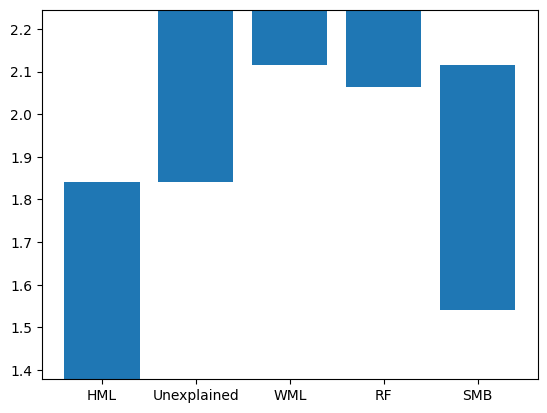

In [34]:
k = (attribution.T * ftk.carino(portfolio, 0)).T / ftk.carino(ftk.compound_return(portfolio), 0)
s = k.sum().sort_values(ascending=False)
c = s.cumsum()
n = s[s < 0].reindex(c.index).fillna(0)
b = (c - n).shift(1)

import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
ax.bar(s.index, s, bottom=b)
plt.show()

In [35]:
s

Mkt-RF         1.378156
HML            0.463883
Unexplained    0.403163
WML           -0.129931
RF            -0.182439
SMB           -0.573692
dtype: float64